In [1]:
import os
import glob
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import matplotlib.cm as cm
import random

from collections import defaultdict

# smoc55 trend

In [14]:
output_dir = '/Data/skd/scratch/innag3580/comp/smoc/'
all_output = glob.glob(os.path.join(output_dir, '*.nc'))
len_final_files = len('smoc55_member_1001.001.nc')
output = [f for f in all_output if len(os.path.basename(f)) == len_final_files]
da_list = [xr.open_dataarray(file) for file in output]
annual_means_list = [da.resample(time='1Y').mean() for da in da_list]

In [3]:
# Load the CSV file containing members to be highlighted in red
path = os.path.join(os.environ['HOME'], 'phase1_CONDA/publishable_code')
filename = 'plotting-change_point_indices_3.0_40_20_5.csv'
file = os.path.join(path, filename)
df = pd.read_csv(file)

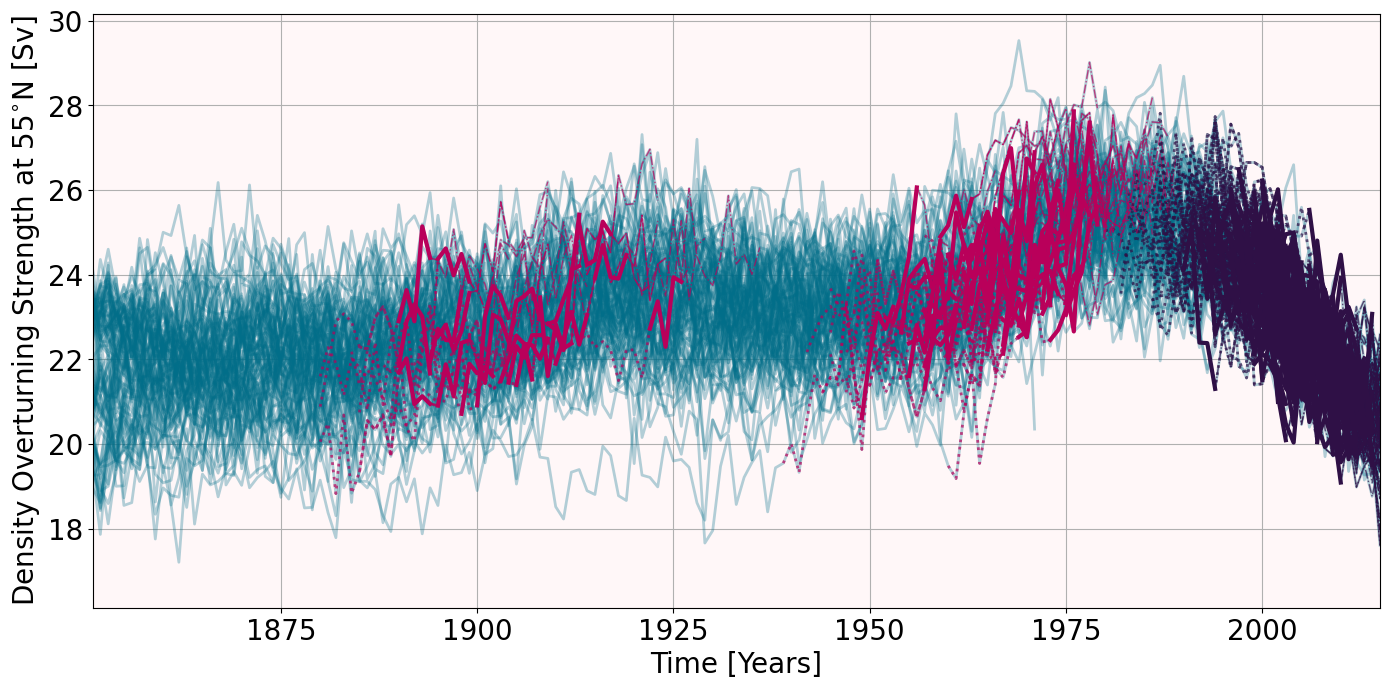

In [31]:
# Set up plot
plt.figure(figsize=(14, 7))

plt.gca().set_facecolor('#FFF7F8')
color_map = cmo.deep
labelsize = 20
num_files = len(annual_means_list)

# Assign colors from the color map to each DataArray
colors = cm.viridis_r(np.linspace(0.3, 0.6, num_files))
random.shuffle(colors)

# Convert 'members_to_highlight' to set for faster lookup and strip any whitespace
members_to_highlight_set = {str(member).strip() for member in members_to_highlight}

# Create dictionary to hold lists of (value, condition) tuples for each member
members_values_dict = defaultdict(list)

# Populate the dictionary with (value, condition) pairs
for member, value, condition in zip(df['Member'], df['Values'], df['Condition']):
    cleaned_member = str(member).strip()
    cleaned_condition = condition.strip()  # Optional: Strip whitespace from condition if needed
    members_values_dict[cleaned_member].append((value, cleaned_condition))

# Now `members_values_dict` will hold both values and their corresponding conditions
# Example structure: 
# members_values_dict = {
#     'A': [(1, 'Above'), (2, 'Below')],
#     'B': [(3, 'Above'), (5, 'Above')]
# }

# First plot all DataArrays
for idx, (annual_mean, color) in enumerate(zip(annual_means_list, colors)):
    color = '#016E89'
    file_name = os.path.basename(output[idx])
    member_id = file_name.split('_')[2].split('.')[0] + '.' + file_name.split('.')[1].strip()
    
    annual_mean = annual_mean.sel(time=slice(None, '2014'))
    annual_mean.plot(color=color, alpha=0.3, linewidth=2)

# Plot highlighted segments based on condition
for idx, (annual_mean, color) in enumerate(zip(annual_means_list, colors)):
    file_name = os.path.basename(output[idx])
    member_id = file_name.split('_')[2].split('.')[0] + '.' + file_name.split('.')[1].strip()
    
    if member_id in members_to_highlight_set:  # Check if member is to be highlighted
        
        # Iterate through all (value, condition) pairs for that member
        for shift_year, condition in members_values_dict[member_id]:
            start_year = 1851 + shift_year - 2
            end_year = 1851 + shift_year + 2
            
            pre_segment = annual_mean.sel(time=slice(f"{start_year-10}", f"{start_year}"))
            solid_segment = annual_mean.sel(time=slice(f"{start_year}", f"{end_year}"))
            post_segment = annual_mean.sel(time=slice(f"{end_year}", f"{end_year+10}"))
            
            # Determine color based on condition
            color = '#b9005a' if condition == 'Above' else '#2f1046'

            # Plot the segments
            pre_segment.plot(color=color, alpha=0.7, linewidth=2, linestyle=':')
            solid_segment.plot(color=color, alpha=1, linewidth=3, linestyle='-')
            post_segment.plot(color=color, alpha=0.7, linewidth=1, linestyle='-.')

# Improve plot aesthetics
plt.xlabel('Time [Years]', fontsize=labelsize)
plt.ylabel('Density Overturning Strength at 55$^{\circ}$N [Sv]', fontsize=labelsize)
plt.xticks(fontsize=labelsize, rotation=0)
plt.yticks(fontsize=labelsize)

# Set custom x-axis limits
plt.xlim(pd.to_datetime('1851-01-01'), pd.to_datetime('2014-12-31'))

# Define years for custom x-axis labels
years = np.arange(1875, 2015, 25)
x_ticks = pd.to_datetime(years, format='%Y')
x_labels = [str(year) for year in years]

# Set the custom ticks and labels
plt.gca().set_xticks(x_ticks)
plt.gca().set_xticklabels(x_labels, ha='center', fontsize=labelsize)

plt.grid(True)
plt.tight_layout()

# Show the plot and save it
plt.savefig('Figure_smoc55_trend.png', bbox_inches='tight', dpi=300)#, transparent=True)
#plt.show()

# Old plot

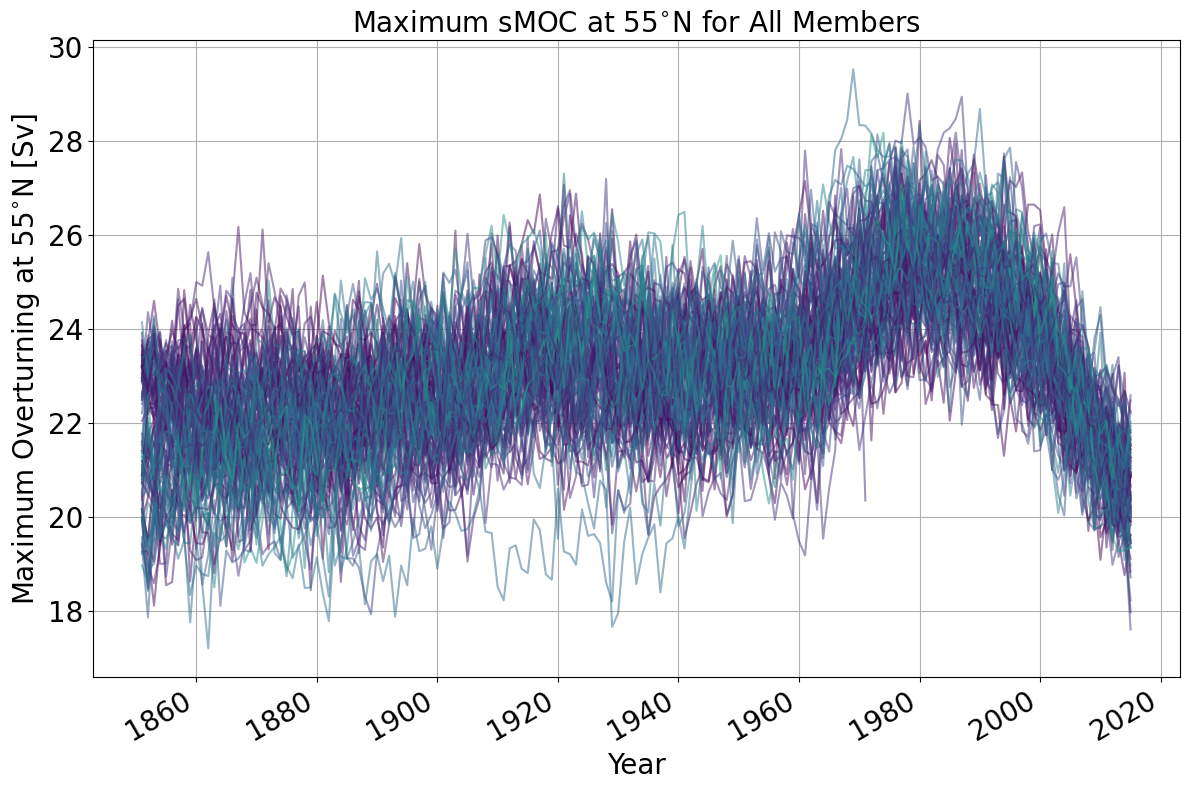

In [9]:
# Set up plot
plt.figure(figsize=(12, 8))
color_map = cmocean.cm.deep
labelsize = 20
num_files = len(annual_means_list)

# Assign colors from the color map to each DataArray
colors = cm.viridis(np.linspace(0, 0.7, num_files))
random.shuffle(colors)

# Plot each DataArray as its own time series
for idx, (annual_mean, color) in enumerate(zip(annual_means_list, colors)):
    annual_mean = annual_mean.sel(time=slice(None, '2014'))  # Filter DataArray to include only data until 2014
    annual_mean.plot(color=color, alpha=0.5)

# Improve plot aesthetics
plt.title(r'Maximum sMOC at 55$^{\circ}$N for All Members', fontsize=labelsize)
plt.xlabel('Year', fontsize=labelsize)
plt.ylabel('Maximum Overturning at 55$^{\circ}$N [Sv]', fontsize=labelsize)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.grid(True)
plt.tight_layout()

# Show the plot and save it
#plt.savefig('Figure_smoc55_trend.png', bbox_inches='tight', dpi=300, transparent=True)
#plt.show()

# linear trend maps of hmxl and shf 

## hmxl

In [50]:
# Define file paths and names
path = '/Data/skd/scratch/innag3580/comp/averages/'
hmxl_file_1850 = 'HMXL_mean_185001-185912.nc'
hmxl_file_2010 = 'HMXL_mean_201001-201412.nc'

ds_hmxl_1850 = xr.open_dataset(os.path.join(path, hmxl_file_1850)).mean('time')
ds_hmxl_2010 = xr.open_dataset(os.path.join(path, hmxl_file_2010)).mean('time')

ds_hmxl_1850['HMXL']=ds_hmxl_1850.HMXL*1e-2
ds_hmxl_2010['HMXL']=ds_hmxl_2010.HMXL*1e-2

In [51]:
ds_hmxl_anom = (ds_hmxl_2010 - ds_hmxl_1850)

In [52]:
# Define regions and masks
grid_name = 'POP_gx1v7'
region_defs = {
        'subzero_Atlantic':[
            {'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [10.0, 70.0], 'TLONG': [260.0, 360.0]}}
        ],
        #'superzero_Atlantic':[
        #    {'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [10.0, 70.0], 'TLONG': [0, 20.0]}}
        #],
        'Mediterranean': [
            {'match': {'REGION_MASK': [7]}}
        ],
        'LabradorSea': [
            {'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [10.0, 70.0]}}
        ],
            'NordicSea': [
            {'match': {'REGION_MASK': [9]}, 'bounds': {'TLAT': [10.0, 70.0], 'TLONG': [260.0, 360.0]}}
        ]
    }
mask = pop_tools.region_mask_3d(grid_name, region_defs=region_defs)
mask = mask.sum('region')

replacement_value = 0
ds_hmxl_anom['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_hmxl_anom['TLAT']), np.logical_or(np.isinf(ds_hmxl_anom['TLAT']), np.ma.getmask(ds_hmxl_anom['TLAT']))),
    replacement_value,
    ds_hmxl_anom['TLAT'])
ds_hmxl_anom['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_hmxl_anom['TLONG']), np.logical_or(np.isinf(ds_hmxl_anom['TLONG']), np.ma.getmask(ds_hmxl_anom['TLONG']))),
    replacement_value,
    ds_hmxl_anom['TLONG'])

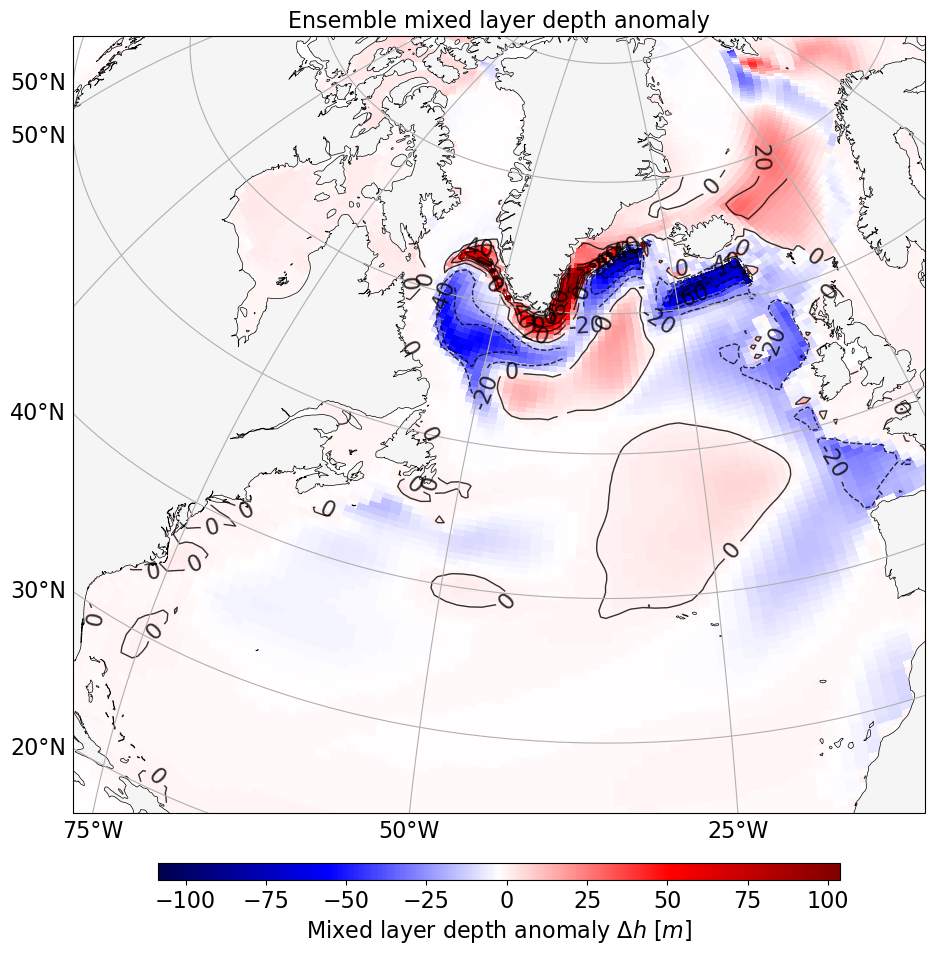

In [53]:
# Compute mean and prepare plotting data
plotting_data = ds_hmxl_anom.HMXL

# Set up color and label sizes
cbar_kwargs = {
    'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
    'label': r'Mixed layer depth anomlay $\Delta h$ [$m$]', 'pad': 0.05
}
labelsize = 20

# Define plot limits
vmin = plotting_data.min().item()
vmax = plotting_data.max().item()
labelsize = 16  # Set your desired fontsize

# Plot configuration
plt.figure(figsize=(11, 13))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80, -10, 25, 80], crs=ccrs.PlateCarree())

# Add cartopy feature for coastlines
nature_coast = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m', linewidth=0.5, edgecolor='black', facecolor='whitesmoke')

# Plotting data as pcolormesh
pc = plotting_data.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    x='TLONG',
    y='TLAT',
    cbar_kwargs=cbar_kwargs,
    cmap='seismic',
    vmin=vmin,
    vmax=vmax
)

# Adjust colorbar label size
pc.colorbar.ax.tick_params(labelsize=labelsize)
pc.colorbar.set_label(r'Mixed layer depth anomaly $\Delta h$ [$m$]', size=labelsize)

# Axis ticks
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)

# Add gridlines
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}

# Add coastlines
ax.add_feature(nature_coast)
plt.title('Ensemble mixed layer depth anomaly', fontsize=labelsize)

# Contour settings
contour_levels = np.arange(np.floor(plotting_data.min().item()),
                           np.ceil(plotting_data.max().item()) + 0.5, 0.5)
cs = ax.contour(plotting_data.TLONG, plotting_data.TLAT, 
                plotting_data.where(mask > 0), 
                levels=10, 
                alpha=0.8,
                linewidths=1, 
                colors='black', 
                transform=ccrs.PlateCarree())
ax.clabel(cs, fmt='%1.0f', inline=True, fontsize=labelsize)

# Save the plot
plt.savefig('Figure_hmxl_anomaly.png', bbox_inches='tight', dpi=300)
#plt.show()

## shf

In [35]:
# Define file paths and names
path = '/Data/skd/scratch/innag3580/comp/averages/'
shf_file_1850 = 'SHF_mean_185001-185912.nc'
shf_file_2010 = 'SHF_mean_201001-201412.nc'

ds_shf_1850 = xr.open_dataset(os.path.join(path, shf_file_1850)).mean('time')
ds_shf_2010 = xr.open_dataset(os.path.join(path, shf_file_2010)).mean('time')

ds_shf_1850['SHF']=ds_shf_1850.SHF*1e-2
ds_shf_2010['SHF']=ds_shf_2010.SHF*1e-2

In [36]:
ds_shf_anom = (ds_shf_2010 - ds_shf_1850)

In [37]:
# Define regions and masks
grid_name = 'POP_gx1v7'
region_defs = {
        'subzero_Atlantic':[
            {'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [10.0, 70.0], 'TLONG': [260.0, 360.0]}}
        ],
        #'superzero_Atlantic':[
        #    {'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [10.0, 70.0], 'TLONG': [0, 20.0]}}
        #],
        'Mediterranean': [
            {'match': {'REGION_MASK': [7]}}
        ],
        'LabradorSea': [
            {'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [10.0, 70.0]}}
        ],
            'NordicSea': [
            {'match': {'REGION_MASK': [9]}, 'bounds': {'TLAT': [10.0, 70.0], 'TLONG': [260.0, 360.0]}}
        ]
    }
mask = pop_tools.region_mask_3d(grid_name, region_defs=region_defs)
mask = mask.sum('region')

replacement_value = 0
ds_shf_anom['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_shf_anom['TLAT']), np.logical_or(np.isinf(ds_shf_anom['TLAT']), np.ma.getmask(ds_shf_anom['TLAT']))),
    replacement_value,
    ds_shf_anom['TLAT'])
ds_shf_anom['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_shf_anom['TLONG']), np.logical_or(np.isinf(ds_shf_anom['TLONG']), np.ma.getmask(ds_shf_anom['TLONG']))),
    replacement_value,
    ds_shf_anom['TLONG'])

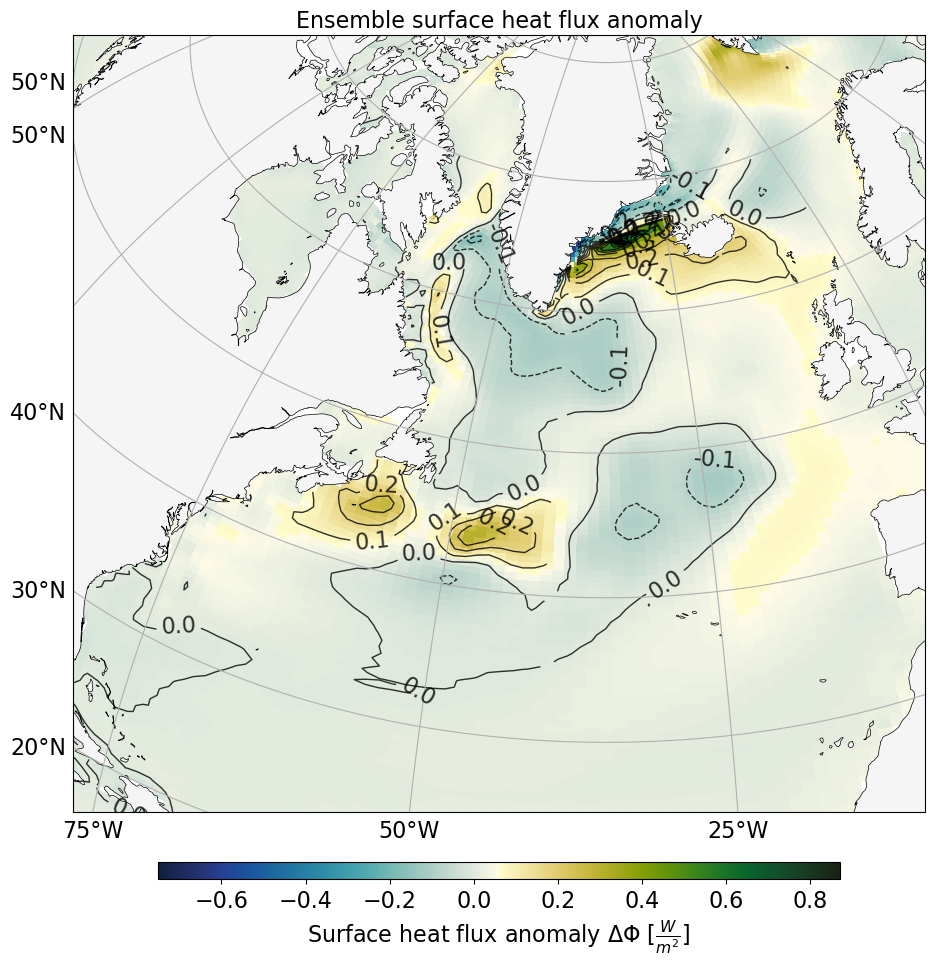

In [48]:
# Compute mean and prepare plotting data
plotting_data = ds_shf_anom.SHF

# Set up color and label sizes
cbar_kwargs = {
    'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
    'label': r'Surface heat flux anomaly $\Delta\Phi$ [$\frac{W}{m^2}$]', 'pad': 0.05
}
labelsize = 20

# Define plot limits
vmin = plotting_data.min().item()
vmax = plotting_data.max().item()
labelsize = 16  # Set your desired fontsize

# Plot configuration
plt.figure(figsize=(11, 13))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80, -10, 25, 80], crs=ccrs.PlateCarree())

# Add cartopy feature for coastlines
nature_coast = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m', linewidth=0.5, edgecolor='black', facecolor='whitesmoke')

# Plotting data as pcolormesh
pc = plotting_data.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    x='TLONG',
    y='TLAT',
    cbar_kwargs=cbar_kwargs,
    cmap=cmo.delta,
    vmin=vmin,
    vmax=vmax
)

# Adjust colorbar label size
pc.colorbar.ax.tick_params(labelsize=labelsize)
pc.colorbar.set_label(r'Surface heat flux anomaly $\Delta\Phi$ [$\frac{W}{m^2}$]', size=labelsize)

# Axis ticks
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)

# Add gridlines
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}

# Add coastlines
ax.add_feature(nature_coast)
plt.title('Ensemble surface heat flux anomaly', fontsize=labelsize)

# Contour settings
contour_levels = np.arange(np.floor(plotting_data.min().item()),
                           np.ceil(plotting_data.max().item()) + 0.5, 0.5)
cs = ax.contour(plotting_data.TLONG, plotting_data.TLAT, 
                plotting_data.where(mask > 0), 
                levels=20, 
                alpha=0.8,
                linewidths=1, 
                colors='black', 
                transform=ccrs.PlateCarree())
ax.clabel(cs, fmt='%1.1f', inline=True, fontsize=labelsize)

# Save the plot
plt.savefig('Figure_shf_anomaly.png', bbox_inches='tight', dpi=300)
#plt.show()